<a href="https://colab.research.google.com/github/HARSHIT097/Neural_networks/blob/main/sequential_data_Rnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:


import tensorflow as tf

from tensorflow.keras.layers import Input, SimpleRNN, GRU, LSTM, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# simple Rnn

[-1.06880992e-03  2.21204433e-01  1.61674886e-01  3.90594600e-01
  4.30683500e-01  3.00236518e-01  4.63348274e-01  8.51429022e-01
  8.40980545e-01  7.63914133e-01  7.03728693e-01  8.92115583e-01
  1.03817882e+00  9.44827164e-01  1.06727076e+00  1.04026495e+00
  1.01011894e+00  8.21278688e-01  1.09641317e+00  9.91148503e-01
  8.67281504e-01  7.35935039e-01  9.72850633e-01  8.74554138e-01
  7.42108180e-01  6.70648332e-01  3.74731390e-01  2.08814718e-01
  1.95724077e-01  2.44083073e-01  1.90647538e-01  4.46887606e-02
 -9.88727079e-02 -5.68831848e-02 -3.80337690e-01 -5.56805362e-01
 -3.34139416e-01 -5.79070674e-01 -6.19647086e-01 -8.14438699e-01
 -7.37592254e-01 -8.52935213e-01 -7.98273253e-01 -9.93975610e-01
 -8.25520492e-01 -9.40494278e-01 -8.63395407e-01 -1.10305687e+00
 -8.57099078e-01 -1.02701197e+00 -1.13170489e+00 -9.06060867e-01
 -7.44022386e-01 -7.76532833e-01 -6.46613795e-01 -7.49408268e-01
 -6.75375532e-01 -4.93728816e-01 -4.05065709e-01 -3.77532916e-01
 -1.34726139e-01 -2.19350

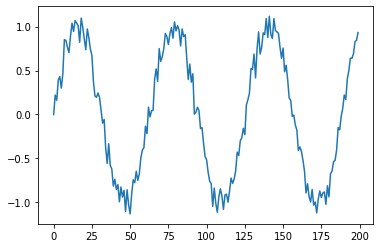

In [ ]:
series = np.sin(0.1*np.arange(200)) + np.random.randn(200)*0.1
print(series)
#plotiing
plt.plot(series)
plt.show()

In [ ]:
series.shape

(200,)

[ 0.          0.09983342  0.19866933  0.29552021  0.38941834  0.47942554
  0.56464247  0.64421769  0.71735609  0.78332691  0.84147098  0.89120736
  0.93203909  0.96355819  0.98544973  0.99749499  0.9995736   0.99166481
  0.97384763  0.94630009  0.90929743  0.86320937  0.8084964   0.74570521
  0.67546318  0.59847214  0.51550137  0.42737988  0.33498815  0.23924933
  0.14112001  0.04158066 -0.05837414 -0.15774569 -0.2555411  -0.35078323
 -0.44252044 -0.52983614 -0.61185789 -0.68776616 -0.7568025  -0.81827711
 -0.87157577 -0.91616594 -0.95160207 -0.97753012 -0.993691   -0.99992326
 -0.99616461 -0.98245261 -0.95892427 -0.92581468 -0.88345466 -0.83226744
 -0.77276449 -0.70554033 -0.63126664 -0.55068554 -0.46460218 -0.37387666
 -0.2794155  -0.1821625  -0.0830894   0.0168139   0.1165492   0.21511999
  0.31154136  0.40484992  0.49411335  0.57843976  0.6569866   0.72896904
  0.79366786  0.85043662  0.8987081   0.93799998  0.96791967  0.98816823
  0.99854335  0.99894134  0.98935825  0.96988981  0

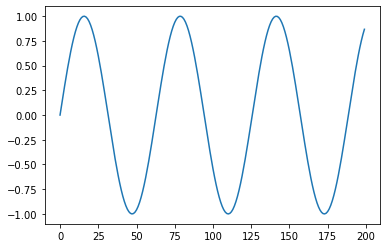

In [ ]:
#without noise
series = np.sin(0.1*np.arange(200)) #+ np.random.randn(200)*0.1
print(series)
#plotiing
plt.plot(series)
plt.show()

In [ ]:
#build the dataset

T = 10
D = 1
X = []
Y = []

for t in range(len(series) - T):
  x=series[t:t+T]
  X.append(x)
  y = series[t+T]
  Y.append(y)

X = np.array(X).reshape(-1, T, 1) #data N x T x D
Y = np.array(Y)
N = len(X)
print("X.shape and Y.shape", X.shape, Y.shape)

X.shape and Y.shape (190, 10, 1) (190,)


In [ ]:
#auto regressive RNN model

i = Input(shape=(T,1))
#x = SimpleRNN(5, activation='relu')(i)
x = SimpleRNN(5)(i) #deault activation function is tanh
x = Dense(1)(x)
model = Model(i,x)
model.compile(
    loss='mse',
    optimizer = Adam(lr=0.1),
) 

#train RNN
r = model.fit(
    X[:-N//2], Y[:-N//2],
    epochs=80,
    validation_data=(X[-N//2:], Y[-N//2:]),
)

Epoch 1/80
3/3 [==============================] - 1s 114ms/step - loss: 0.4354 - val_loss: 0.2631
Epoch 2/80
3/3 [==============================] - 0s 22ms/step - loss: 0.1930 - val_loss: 0.0996
Epoch 3/80
3/3 [==============================] - 0s 22ms/step - loss: 0.0899 - val_loss: 0.0886
Epoch 4/80
3/3 [==============================] - 0s 22ms/step - loss: 0.0562 - val_loss: 0.0415
Epoch 5/80
3/3 [==============================] - 0s 24ms/step - loss: 0.0439 - val_loss: 0.0323
Epoch 6/80
3/3 [==============================] - 0s 21ms/step - loss: 0.0372 - val_loss: 0.0395
Epoch 7/80
3/3 [==============================] - 0s 21ms/step - loss: 0.0393 - val_loss: 0.0217
Epoch 8/80
3/3 [==============================] - 0s 31ms/step - loss: 0.0327 - val_loss: 0.0227
Epoch 9/80
3/3 [==============================] - 0s 24ms/step - loss: 0.0343 - val_loss: 0.0231
Epoch 10/80
3/3 [==============================] - 0s 23ms/step - loss: 0.0294 - val_loss: 0.0216
Epoch 11/80
3/3 [===========

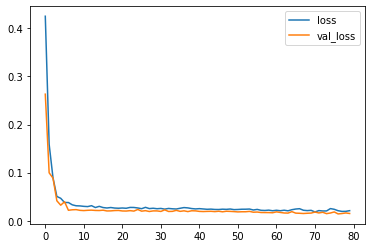

In [ ]:
#plot loss per iteration
plt.plot(r.history["loss"], label='loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()
plt.show()

In [ ]:
#"Wrong" forecast using True targets

validation_target = Y[-N//2:]
validation_prediction = []

#index of First validation input
i = -N//2
while len(validation_prediction) < len(validation_target):
  p = model.predict(X[i].reshape(1,-1,1))[0,0] #1 x 1 array -> scalar
  i += 1

  #updating prediction list
  validation_prediction.append(p)

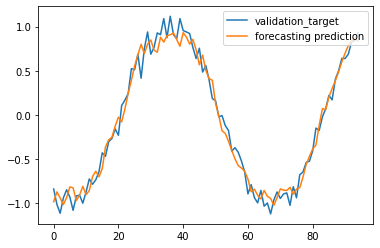

In [ ]:
#plotting

plt.plot(validation_target, label="validation_target")
plt.plot(validation_prediction, label ="forecasting prediction")
plt.legend()

In [ ]:
# forecast future values

validation_prediction = []
validation_target = Y[-N//2:]

#last train input
last_x = X[-N//2] # 1-D array of length T

while len(validation_prediction) < len(validation_target):
  p = model.predict(last_x.reshape(1, -1, 1))[0,0] #1 x 1 array -> scalar

  #update the prediction list
  validation_prediction.append(p)

  #make the new input
  last_x = np.roll(last_x, -1)
  last_x[-1] = p

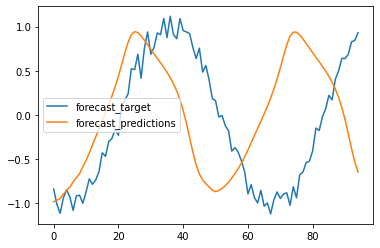

In [ ]:
plt.plot(validation_target, label='forecast_target')
plt.plot(validation_prediction, label='forecast_predictions')
plt.legend()

# focus on RNN shapes

In [ ]:
#N = samples
#D = features
#T = sequence length #time steps in the sequence
#M = no. of hidden units
#K = no. of output units

#make some data

N= 1
T = 10
D = 3
K = 2
X = np.random.randn(N, T, D )

In [ ]:
#make a RNN
M = 5   #hidden units
i = Input(shape=(T,D))
x = SimpleRNN(M)(i)
x = Dense(K)(x)

model = Model(i,x)

In [ ]:
#get output check the shape (1 x 2)
Yhat = model.predict(X)
print(Yhat)

[[ 0.556747  -1.3543767]]


In [ ]:
#get the weights
#see if we can replicate this output
model.summary()

Model: "model_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        [(None, 10, 3)]           0         
_________________________________________________________________
simple_rnn_8 (SimpleRNN)     (None, 5)                 45        
_________________________________________________________________
dense_7 (Dense)              (None, 2)                 12        
Total params: 57
Trainable params: 57
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# weigts
model.layers[1].get_weights()

[array([[ 0.5749058 ,  0.6709431 ,  0.5472384 ,  0.5991631 ,  0.2902183 ],
        [ 0.19755429,  0.00097227,  0.48358065, -0.07379967, -0.58311474],
        [ 0.6296546 ,  0.62975675,  0.44857746,  0.4728691 ,  0.7413997 ]],
       dtype=float32),
 array([[-0.41532397, -0.01351656, -0.33299923, -0.6866135 , -0.49497145],
        [-0.19706984, -0.6157292 , -0.3233313 , -0.19066651,  0.66418695],
        [-0.6369981 , -0.33278418,  0.66403747,  0.16191927, -0.12776728],
        [ 0.54358065, -0.70009637,  0.09156869, -0.03311345, -0.45266312],
        [ 0.2956737 ,  0.14076504,  0.57899725, -0.68183124,  0.3043526 ]],
       dtype=float32),
 array([0., 0., 0., 0., 0.], dtype=float32)]

In [ ]:
#checking shapes
#first output is input -> hidden
#second output is hidden -> hidden
#third output is bias term(vector of length M)

a,b,c = model.layers[1].get_weights()
print(a.shape, b.shape, c.shape)

#D=3 and M=5

(3, 5) (5, 5) (5,)


In [ ]:
Wx, Wh, bh = model.layers[1].get_weights()
Wo, bo = model.layers[2].get_weights()


In [ ]:
h_last = np.zeros(M) #initial hidden state
x = X[0] #the one and only sample
Yhats = [] #where we store the outputs

for t in range(T):
  h = np.tanh(x[t].dot(Wx) + h_last.dot(Wh) + bh)
  y = h.dot(Wo) + bo #we only cares about this value on the last iteration
  Yhats.append(y)

  #imp: assign h to h_last
  h_last = h

  #print the final output
print(Yhat[-1])


[ 0.556747  -1.3543767]


In [ ]:
#we can practice with calculating the output for multiple sample at once(N>1)

# LSTM and RNN - nonlinear sine wave

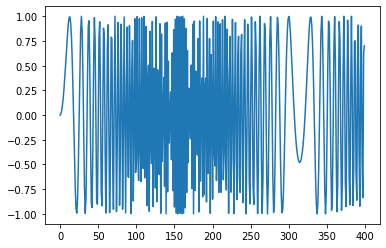

In [ ]:
#creating Data 
series = np.sin((0.1*np.arange(400))**2)

#x(t) = sin(wt^2) timeseries

#Plot
plt.plot(series)
plt.show()

In [ ]:
#build the dataset

T = 10
D = 1
X = []
Y = []

for t in range(len(series) - T):
  x=series[t:t+T]
  X.append(x)
  y = series[t+T]
  Y.append(y)

X = np.array(X).reshape(-1, T) #data N x T 
Y = np.array(Y)
N = len(X)
print("X.shape and Y.shape", X.shape, Y.shape)

X.shape and Y.shape (390, 10) (390,)


In [ ]:
#auto regressive RNN model

i = Input(shape=(T,))
#x = SimpleRNN(5, activation='relu')(i)
#x = SimpleRNN(5)(i) #deault activation function is tanh
x = Dense(1)(i)
model = Model(i,x)
model.compile(
    loss='mse',
    optimizer = Adam(lr=0.1),
) 

#train RNN
r = model.fit(
    X[:-N//2], Y[:-N//2],
    epochs=80,
    validation_data=(X[-N//2:], Y[-N//2:]),
)

Epoch 1/80
7/7 [==============================] - 0s 24ms/step - loss: 0.9604 - val_loss: 0.5181
Epoch 2/80
7/7 [==============================] - 0s 8ms/step - loss: 0.5603 - val_loss: 0.8122
Epoch 3/80
7/7 [==============================] - 0s 8ms/step - loss: 0.5962 - val_loss: 0.8008
Epoch 4/80
7/7 [==============================] - 0s 7ms/step - loss: 0.5650 - val_loss: 0.6322
Epoch 5/80
7/7 [==============================] - 0s 8ms/step - loss: 0.5771 - val_loss: 0.5718
Epoch 6/80
7/7 [==============================] - 0s 9ms/step - loss: 0.5555 - val_loss: 0.5838
Epoch 7/80
7/7 [==============================] - 0s 9ms/step - loss: 0.5702 - val_loss: 0.6480
Epoch 8/80
7/7 [==============================] - 0s 8ms/step - loss: 0.5186 - val_loss: 0.7238
Epoch 9/80
7/7 [==============================] - 0s 7ms/step - loss: 0.5341 - val_loss: 0.6617
Epoch 10/80
7/7 [==============================] - 0s 7ms/step - loss: 0.5123 - val_loss: 0.5853
Epoch 11/80
7/7 [=====================

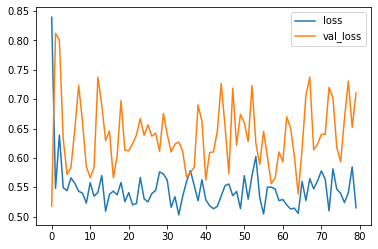

In [ ]:
#plot loss per iteration
plt.plot(r.history["loss"], label='loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()
plt.show()

shape of output (390, 1)


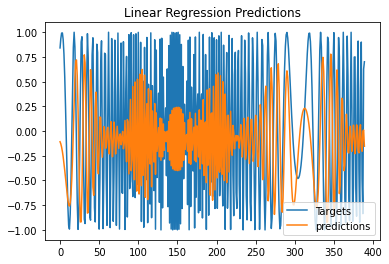

In [ ]:
#one-step forecast using true targets
#note: even the one-step forecast fails badly

outputs = model.predict(X)
print("shape of output", outputs.shape)
predictions = outputs[:,0]

plt.plot(Y, label="Targets")
plt.plot(predictions, label="predictions")
plt.title("Linear Regression Predictions")
plt.legend()
plt.show()

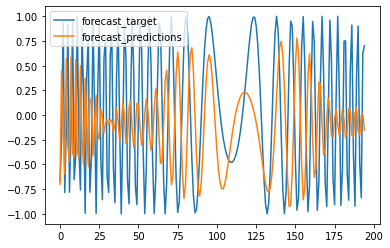

In [ ]:

#one step forecast using true targets
validation_target = Y[-N//2:]
validation_prediction = []

#index of First validation input
i = -N//2
while len(validation_prediction) < len(validation_target):
  p = model.predict(X[i].reshape(1,-1))[0,0] #1 x 1 array -> scalar
  i += 1

  #updating prediction list
  validation_prediction.append(p)

plt.plot(validation_target, label='forecast_target')
plt.plot(validation_prediction, label='forecast_predictions')
plt.legend()

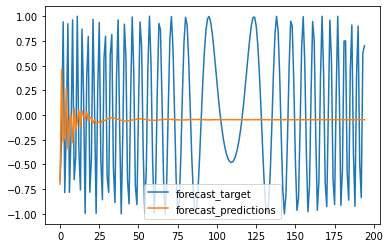

In [ ]:
#multi step forecast using true targets
validation_target = Y[-N//2:]
validation_prediction = []

#index of last train input
last_x = X[-N//2] #1-D array of length T
while len(validation_prediction) < len(validation_target):
  p = model.predict(last_x.reshape(1,-1))[0,0] #1 x 1 array -> scalar
  
  #updating prediction list
  validation_prediction.append(p)
  #make the new input
  last_x = np.roll(last_x, -1)
  last_x[-1] = p
  
plt.plot(validation_target, label='forecast_target')
plt.plot(validation_prediction, label='forecast_predictions')
plt.legend()

trying RNN/LSTM model

In [ ]:
# RNN/lstm model
X = X.reshape(-1, T, 1) # make it N x T x D


i = Input(shape=(T,D))
#x = SimpleRNN(5, activation='relu')(i)
x = LSTM(10)(i) #case-2
#x = SimpleRNN(10)(i) #deault activation function is tanh
x = Dense(1)(x)
model = Model(i,x)
model.compile(
    loss='mse',
    optimizer = Adam(lr=0.05),
) 

#train RNN
r = model.fit(
    X[:-N//2], Y[:-N//2],
    batch_size = 32,
    epochs=200,
    validation_data=(X[-N//2:], Y[-N//2:]),
)

Epoch 1/200
7/7 [==============================] - 2s 83ms/step - loss: 0.5701 - val_loss: 0.5401
Epoch 2/200
7/7 [==============================] - 0s 12ms/step - loss: 0.5213 - val_loss: 0.6210
Epoch 3/200
7/7 [==============================] - 0s 12ms/step - loss: 0.5103 - val_loss: 0.6507
Epoch 4/200
7/7 [==============================] - 0s 12ms/step - loss: 0.4654 - val_loss: 0.5596
Epoch 5/200
7/7 [==============================] - 0s 12ms/step - loss: 0.3935 - val_loss: 0.4948
Epoch 6/200
7/7 [==============================] - 0s 12ms/step - loss: 0.3187 - val_loss: 0.3985
Epoch 7/200
7/7 [==============================] - 0s 12ms/step - loss: 0.2515 - val_loss: 0.3684
Epoch 8/200
7/7 [==============================] - 0s 12ms/step - loss: 0.2266 - val_loss: 0.3225
Epoch 9/200
7/7 [==============================] - 0s 15ms/step - loss: 0.1432 - val_loss: 0.1825
Epoch 10/200
7/7 [==============================] - 0s 13ms/step - loss: 0.1209 - val_loss: 0.1927
Epoch 11/200
7/7 [=

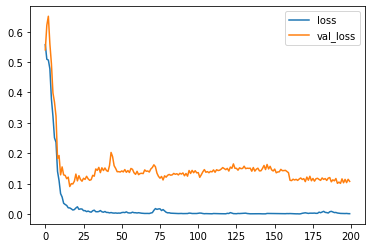

In [ ]:
plt.plot(r.history["loss"], label='loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()
plt.show()

shape of output (390, 1)


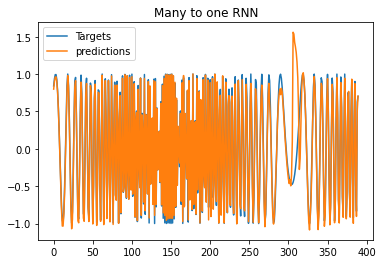

In [ ]:
#one-step forecast using true targets
#note: even the one-step forecast fails badly

outputs = model.predict(X)
print("shape of output", outputs.shape)
predictions = outputs[:,0]

plt.plot(Y, label="Targets")
plt.plot(predictions, label="predictions")
plt.title("Many to one RNN")
plt.legend()
plt.show()

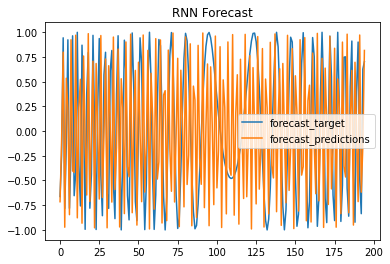

In [ ]:
#multi step forecast 
forecast = []
validation_target = Y[-N//2:]
#validation_prediction = []
input_ = X[-N//2]

#index of last train input
#last_x = X[-N//2] #1-D array of length T

#while len(validation_prediction) < len(validation_target):
while len(forecast) < len(validation_target):
  #p = model.predict(last_x.reshape(1,-1))[0,0] #1 x 1 array -> scalar
  f = model.predict(input_.reshape(1, T,1))[0,0]
  #updating prediction list
  forecast.append(f)
  #make the new input
  input_ = np.roll(input_, -1)
  #last_x[-1] = p
  input_[-1] = f

plt.plot(validation_target, label='forecast_target')
plt.plot(forecast, label='forecast_predictions')
plt.legend()
plt.title("RNN Forecast")
plt.show()

# long Distance problem

In [ ]:
from tensorflow.keras.layers import Input, SimpleRNN, GRU, LSTM, Dense, Flatten, GlobalMaxPool1D

In [ ]:
#build the dataset
#a nonlinear and long-distance dataset
# we will test long-distance vs short-distance patterns

#start with small T and increase it later
T = 10
D = 1
X = []
Y = []

def get_label(x, i1, i2, i3):
  #x = sequence
  if x[i1] < 0 and x[i2] < 0 and x[i3] < 0:
    return 1
  if x[i1] < 0 and x[i2] > 0 and x[i3] > 0:
    return 1
  if x[i1] > 0 and x[i2] < 0 and x[i3] > 0:
    return 1
  if x[i1] > 0 and x[i2] > 0 and x[i3] < 0:
    return 1
  return 0

for t in range(5000):
  x = np.random.randn(T)
  X.append(x)
  y = get_label(x, -1,-2,-3) # short distance
  #y = get_label(x, 0, 1, 2) # long distance
  Y.append(y)

X = np.array(X)
Y = np.array(Y)
N = len(X)


In [ ]:
#trying linear model first - : classifiaction problem now
i = Input(shape=(T,))
x = Dense(1, activation='sigmoid')(i)
model = Model(i,x)
model.compile(
    loss='binary_crossentropy',
    optimizer=Adam(lr=0.01),
    metrics=['accuracy'],
)

#train the network
r = model.fit(
    X, Y,
    epochs=100,
    validation_split=0.5,
)

Epoch 1/100
79/79 [==============================] - 1s 4ms/step - loss: 0.8077 - accuracy: 0.4843 - val_loss: 0.7014 - val_accuracy: 0.5344
Epoch 2/100
79/79 [==============================] - 0s 2ms/step - loss: 0.6989 - accuracy: 0.5065 - val_loss: 0.6942 - val_accuracy: 0.4996
Epoch 3/100
79/79 [==============================] - 0s 2ms/step - loss: 0.6938 - accuracy: 0.5138 - val_loss: 0.6936 - val_accuracy: 0.5036
Epoch 4/100
79/79 [==============================] - 0s 2ms/step - loss: 0.6941 - accuracy: 0.4926 - val_loss: 0.6950 - val_accuracy: 0.4900
Epoch 5/100
79/79 [==============================] - 0s 2ms/step - loss: 0.6929 - accuracy: 0.5028 - val_loss: 0.6937 - val_accuracy: 0.5072
Epoch 6/100
79/79 [==============================] - 0s 2ms/step - loss: 0.6921 - accuracy: 0.5283 - val_loss: 0.6942 - val_accuracy: 0.4816
Epoch 7/100
79/79 [==============================] - 0s 2ms/step - loss: 0.6949 - accuracy: 0.4866 - val_loss: 0.6943 - val_accuracy: 0.5008
Epoch 8/100
7

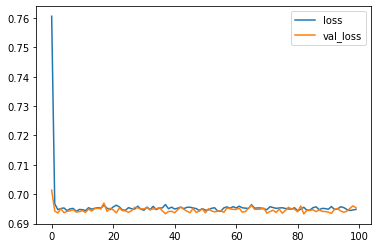

In [ ]:
#plot loss per iteration
plt.plot(r.history["loss"], label='loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()
plt.show()

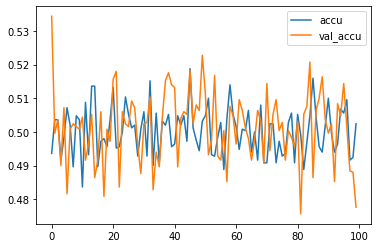

In [ ]:
#plot loss per iteration
plt.plot(r.history["accuracy"], label='accu')
plt.plot(r.history['val_accuracy'], label = 'val_accu')
plt.legend()
plt.show()

RNN/LSTM

In [ ]:
#simple RNN
inputs = np.expand_dims(X, -1)

#make
i = Input(shape=(T,D))

#method
#x = LSTM(5)(i)
x = SimpleRNN(5)(i)
#x = GRU(5)(i)

#alternatively or second method
#x = LSTM(5, return_sequences=True)(i)
#x = GlobalMaxPool1D()(x)

x = Dense(1, activation='sigmoid')(x)
model = Model(i,x)
model.compile(
    loss="binary_crossentropy",
    #optimzer='rmsprop',
    #optimizer="adam",
    optimizer=Adam(lr=0.01),
    #optimizer=SGD(lr=0.1, momentum=0.9),
    metrics=['accuracy'],
)

In [ ]:
#train the RNN
r = model.fit(
    inputs, Y,
    epochs=200,
    validation_split=0.5,
)

Epoch 1/200
79/79 [==============================] - 1s 7ms/step - loss: 0.7040 - accuracy: 0.5458 - val_loss: 0.6536 - val_accuracy: 0.6356
Epoch 2/200
79/79 [==============================] - 0s 4ms/step - loss: 0.6361 - accuracy: 0.6955 - val_loss: 0.5779 - val_accuracy: 0.7636
Epoch 3/200
79/79 [==============================] - 0s 4ms/step - loss: 0.5547 - accuracy: 0.7674 - val_loss: 0.4829 - val_accuracy: 0.8108
Epoch 4/200
79/79 [==============================] - 0s 4ms/step - loss: 0.4682 - accuracy: 0.8106 - val_loss: 0.3903 - val_accuracy: 0.8496
Epoch 5/200
79/79 [==============================] - 0s 4ms/step - loss: 0.3725 - accuracy: 0.8530 - val_loss: 0.3216 - val_accuracy: 0.8880
Epoch 6/200
79/79 [==============================] - 0s 4ms/step - loss: 0.3058 - accuracy: 0.8940 - val_loss: 0.2839 - val_accuracy: 0.8788
Epoch 7/200
79/79 [==============================] - 0s 4ms/step - loss: 0.2668 - accuracy: 0.8960 - val_loss: 0.2363 - val_accuracy: 0.9268
Epoch 8/200
7

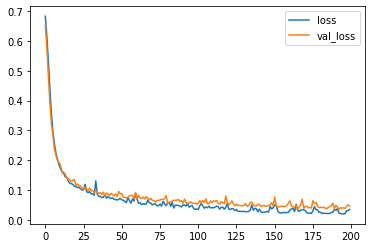

In [ ]:
#plot loss per iteration
plt.plot(r.history["loss"], label='loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()
plt.show()

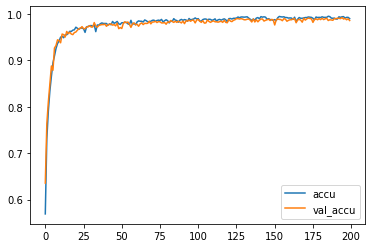

In [ ]:
#plot loss per iteration
plt.plot(r.history["accuracy"], label='accu')
plt.plot(r.history['val_accuracy'], label = 'val_accu')
plt.legend()
plt.show()

## Experiments

the problem is solved with simple RNN no vanishing gradient problem in this

In [ ]:

#start with small T and increase it later
T = 10
D = 1
X = []
Y = []

for t in range(5000):
  x = np.random.randn(T)
  X.append(x)
  #y = get_label(x, -1,-2,-3) # short distance
  y = get_label(x, 0, 1, 2) # long distance
  Y.append(y)

X = np.array(X)
Y = np.array(Y)
N = len(X)


In [ ]:
#simple RNN
inputs = np.expand_dims(X, -1)

#make
i = Input(shape=(T,D))

#method
x = LSTM(5)(i)
#x = SimpleRNN(5)(i)
#x = GRU(5)(i)

#alternatively or second method
#x = LSTM(5, return_sequences=True)(i)
#x = GlobalMaxPool1D()(x)

x = Dense(1, activation='sigmoid')(x)
model = Model(i,x)
model.compile(
    loss="binary_crossentropy",
    #optimzer='rmsprop',
    #optimizer="adam",
    optimizer=Adam(lr=0.01),
    #optimizer=SGD(lr=0.1, momentum=0.9),
    metrics=['accuracy'],
)

In [ ]:
#train the RNN
r = model.fit(
    inputs, Y,
    epochs=200,
    validation_split=0.5,
)

Epoch 1/200
79/79 [==============================] - 3s 12ms/step - loss: 0.6937 - accuracy: 0.5105 - val_loss: 0.6958 - val_accuracy: 0.4884
Epoch 2/200
79/79 [==============================] - 1s 7ms/step - loss: 0.6926 - accuracy: 0.5227 - val_loss: 0.6949 - val_accuracy: 0.4836
Epoch 3/200
79/79 [==============================] - 1s 7ms/step - loss: 0.6930 - accuracy: 0.4982 - val_loss: 0.6976 - val_accuracy: 0.4920
Epoch 4/200
79/79 [==============================] - 1s 7ms/step - loss: 0.6939 - accuracy: 0.5023 - val_loss: 0.6970 - val_accuracy: 0.4924
Epoch 5/200
79/79 [==============================] - 0s 6ms/step - loss: 0.6930 - accuracy: 0.5158 - val_loss: 0.6958 - val_accuracy: 0.4904
Epoch 6/200
79/79 [==============================] - 0s 6ms/step - loss: 0.6935 - accuracy: 0.5028 - val_loss: 0.6965 - val_accuracy: 0.4916
Epoch 7/200
79/79 [==============================] - 1s 7ms/step - loss: 0.6912 - accuracy: 0.5273 - val_loss: 0.6951 - val_accuracy: 0.4816
Epoch 8/200


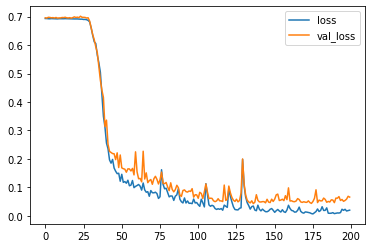

In [ ]:
#plot loss per iteration
plt.plot(r.history["loss"], label='loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()
plt.show()

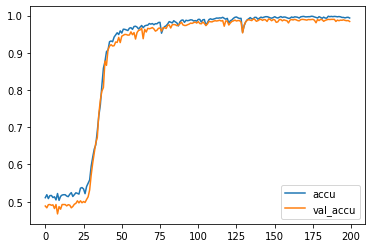

In [ ]:
#plot loss per iteration
plt.plot(r.history["accuracy"], label='accu')
plt.plot(r.history['val_accuracy'], label = 'val_accu')
plt.legend()
plt.show()

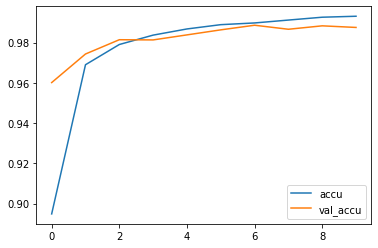

In [ ]:
#plot loss per iteration
plt.plot(r.history["accuracy"], label='accu')
plt.plot(r.history['val_accuracy'], label = 'val_accu')
plt.legend()
plt.show()

## Experiment -2

the problem is solved with simple RNN no vanishing gradient problem in this

In [ ]:

#start with small T and increase it later
T = 20
D = 1
X = []
Y = []

for t in range(5000):
  x = np.random.randn(T)
  X.append(x)
  #y = get_label(x, -1,-2,-3) # short distance
  y = get_label(x, 0, 1, 2) # long distance
  Y.append(y)

X = np.array(X)
Y = np.array(Y)
N = len(X)


In [ ]:
#simple RNN
inputs = np.expand_dims(X, -1)

#make
i = Input(shape=(T,D))

#method
#x = LSTM(5)(i)
x = SimpleRNN(5)(i)
#x = GRU(5)(i)

#alternatively or second method
#x = LSTM(5, return_sequences=True)(i)
#x = GlobalMaxPool1D()(x)

x = Dense(1, activation='sigmoid')(x)
model = Model(i,x)
model.compile(
    loss="binary_crossentropy",
    #optimzer='rmsprop',
    #optimizer="adam",
    optimizer=Adam(lr=0.01),
    #optimizer=SGD(lr=0.1, momentum=0.9),
    metrics=['accuracy'],
)

In [ ]:
#train the RNN
r = model.fit(
    inputs, Y,
    epochs=200,
    validation_split=0.5,
)

Epoch 1/200
79/79 [==============================] - 3s 12ms/step - loss: 0.6938 - accuracy: 0.5153 - val_loss: 0.6933 - val_accuracy: 0.4976
Epoch 2/200
79/79 [==============================] - 1s 7ms/step - loss: 0.6942 - accuracy: 0.4888 - val_loss: 0.6933 - val_accuracy: 0.5156
Epoch 3/200
79/79 [==============================] - 1s 6ms/step - loss: 0.6919 - accuracy: 0.5273 - val_loss: 0.6885 - val_accuracy: 0.5384
Epoch 4/200
79/79 [==============================] - 0s 6ms/step - loss: 0.6827 - accuracy: 0.5608 - val_loss: 0.6907 - val_accuracy: 0.5468
Epoch 5/200
79/79 [==============================] - 1s 7ms/step - loss: 0.6661 - accuracy: 0.6100 - val_loss: 0.6334 - val_accuracy: 0.6464
Epoch 6/200
79/79 [==============================] - 1s 6ms/step - loss: 0.6171 - accuracy: 0.6613 - val_loss: 0.6116 - val_accuracy: 0.6588
Epoch 7/200
79/79 [==============================] - 1s 7ms/step - loss: 0.5896 - accuracy: 0.6963 - val_loss: 0.5732 - val_accuracy: 0.7012
Epoch 8/200


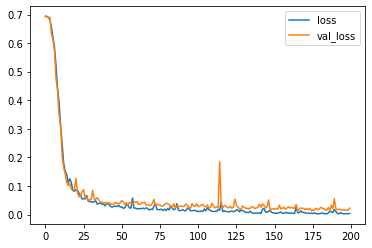

In [ ]:
#plot loss per iteration
plt.plot(r.history["loss"], label='loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()
plt.show()

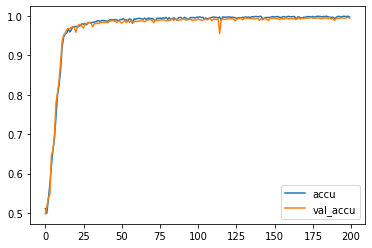

In [ ]:
#plot loss per iteration
plt.plot(r.history["accuracy"], label='accu')
plt.plot(r.history['val_accuracy'], label = 'val_accu')
plt.legend()
plt.show()

In [ ]:
#simpleRNN
    #failed to long distance pattern
#GRU
    #able to find long distance pattern but not capable as of LsTM (larger no of epochs no accuracy match)
#LSTM
    #good but still there still a point that it fail
#LSTM + Global Max Pooling
    #carries all the imp info from hidden state 

# Image Classification

In [ ]:
#generally CNNs for images and RNNs for sequences



Code prep/ Steps

##1 Load the dataset(MNIST)
--- X is of Shape N x T x D(T=D=28)
#2 Instantiate the model
--- LSTM -> Dense(10, activation="softmax'
#3 fit/ plotting
--- also try global max pooling too

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, SimpleRNN, GRU, LSTM, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
#load the data
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train/255.0, x_test/255.0

print("x_train shape", x_train.shape)

11493376/11490434 [==============================] - 0s 0us/step
x_train shape (60000, 28, 28)


In [ ]:
#build the model
i = Input(shape=x_train[0].shape)
x=LSTM(128)(i)
x=Dense(10, activation='softmax')(x)

model=Model(i,x)

#compile the model
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

#train the model
r = model.fit(x_train, y_train, validation_data=(x_test,y_test), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 46s 24ms/step - loss: 0.6586 - accuracy: 0.7816 - val_loss: 0.1321 - val_accuracy: 0.9601
Epoch 2/10
1875/1875 [==============================] - 44s 23ms/step - loss: 0.1090 - accuracy: 0.9663 - val_loss: 0.0839 - val_accuracy: 0.9743
Epoch 3/10
1875/1875 [==============================] - 44s 23ms/step - loss: 0.0691 - accuracy: 0.9789 - val_loss: 0.0575 - val_accuracy: 0.9814
Epoch 4/10
1875/1875 [==============================] - 44s 23ms/step - loss: 0.0543 - accuracy: 0.9839 - val_loss: 0.0611 - val_accuracy: 0.9813
Epoch 5/10
1875/1875 [==============================] - 44s 23ms/step - loss: 0.0436 - accuracy: 0.9871 - val_loss: 0.0549 - val_accuracy: 0.9838
Epoch 6/10
1875/1875 [==============================] - 44s 23ms/step - loss: 0.0334 - accuracy: 0.9897 - val_loss: 0.0472 - val_accuracy: 0.9863
Epoch 7/10
1875/1875 [==============================] - 44s 23ms/step - loss: 0.0297 - accuracy: 0.9903 - val_loss: 0.0425 -

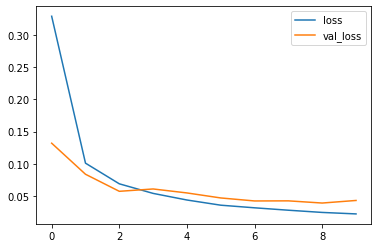

In [ ]:
#plot loss per iteration
plt.plot(r.history["loss"], label='loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()
plt.show()

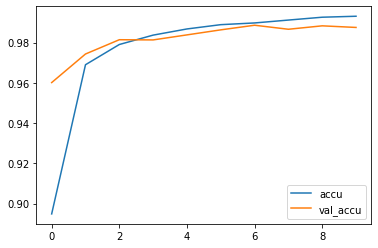

In [ ]:
#plot loss per iteration
plt.plot(r.history["accuracy"], label='accu')
plt.plot(r.history['val_accuracy'], label = 'val_accu')
plt.legend()
plt.show()

con-matrix without normalization
[[ 973    0    0    0    3    0    1    1    0    2]
 [   1 1131    1    0    0    0    2    0    0    0]
 [   1    2 1019    2    1    0    0    6    0    1]
 [   0    0    4 1003    1    0    0    0    2    0]
 [   0    0    0    0  978    0    1    1    1    1]
 [   1    0    0    5    0  880    1    1    4    0]
 [   2    2    1    0   11    2  940    0    0    0]
 [   0    3    4    0    7    0    0 1012    0    2]
 [   1    0    2    3    1    3    1    1  961    1]
 [   0    0    0    0   18    6    0    4    3  978]]


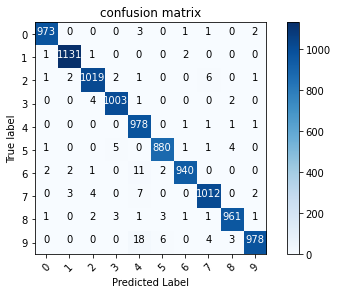

In [ ]:
#confusion matrix

from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title="confusion matrix",
                          cmap=plt.cm.Blues):
  """ normalization
  can be applied"""
  if normalize:
    cm = cm.astype("float")/cm.sum(axis=1)[:, np.newaxis]
    print("Normalized conf-matrix")
  else:
    print("con-matrix without normalization")
  print(cm)


  plt.imshow(cm, interpolation="nearest", cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks= np.arange(len(classes))
  plt.xticks(tick_marks,classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt =".2f" if normalize else "d"
  thresh = cm.max()/2
  for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j,i, format(cm[i,j], fmt),
             horizontalalignment='center',
             color="white" if cm[i,j] > thresh else "black")
    
  plt.tight_layout()
  plt.ylabel("True label")
  plt.xlabel("Predicted Label")
  plt.show()

p_test = model.predict(x_test).argmax(axis=1)
cm=confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

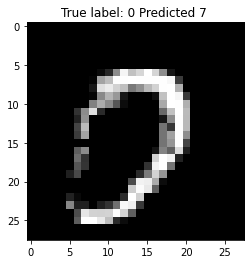

In [ ]:
#misclassified examples

misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted %s " % (y_test[i], p_test[i]));